# Analysis

In [1]:
import pandas as pd

df = pd.read_csv("../results/local_3.csv")
df

,dataset,backend,estimators,max_depth,accuracy,train_time,predict_time,threads,nodes
0,magic,seq,64,0,0.999842,28.19640,0.126082,1,1
1,magic,omp,64,0,0.999737,14.15860,0.067892,2,1
2,magic,ff,64,0,0.999895,14.08040,0.021787,2,1
3,magic,omp,64,0,0.999947,7.13150,0.037664,4,1
4,magic,ff,64,0,0.999842,7.05688,0.021910,4,1
5,magic,omp,64,0,0.999790,3.62197,0.021694,8,1
6,magic,ff,64,0,0.999842,3.55795,0.017920,8,1
7,magic,omp,64,0,0.999737,1.82810,0.014836,16,1
8,magic,ff,64,0,0.999895,1.82169,0.018902,16,1
9,magic,seq,128,0,1.000000,56.38730,0.254390,1,1


In [2]:
df256 = df[df["estimators"] == 64].sort_values(by=["threads", "backend"])
df256 = df256[["train_time", "threads", "backend"]]
df256

,train_time,threads,backend
0,28.19640,1,seq
2,14.08040,2,ff
1,14.15860,2,omp
4,7.05688,4,ff
3,7.13150,4,omp
6,3.55795,8,ff
5,3.62197,8,omp
8,1.82169,16,ff
7,1.82810,16,omp


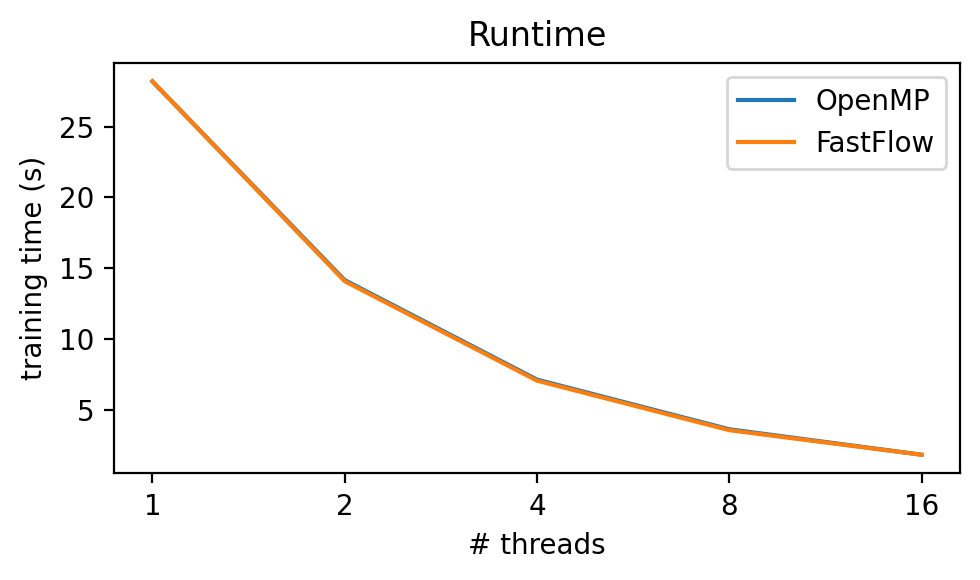

In [3]:
import matplotlib.pyplot as plt


omp = df256[(df256["backend"] == "omp") | (df256["backend"] == "seq")]
ff = df256[(df256["backend"] == "ff") | (df256["backend"] == "seq")]

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Runtime")
plt.plot(omp["threads"], omp["train_time"], label="OpenMP")
plt.plot(ff["threads"], ff["train_time"], label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (s)")
plt.legend()
plt.tight_layout()
plt.show()

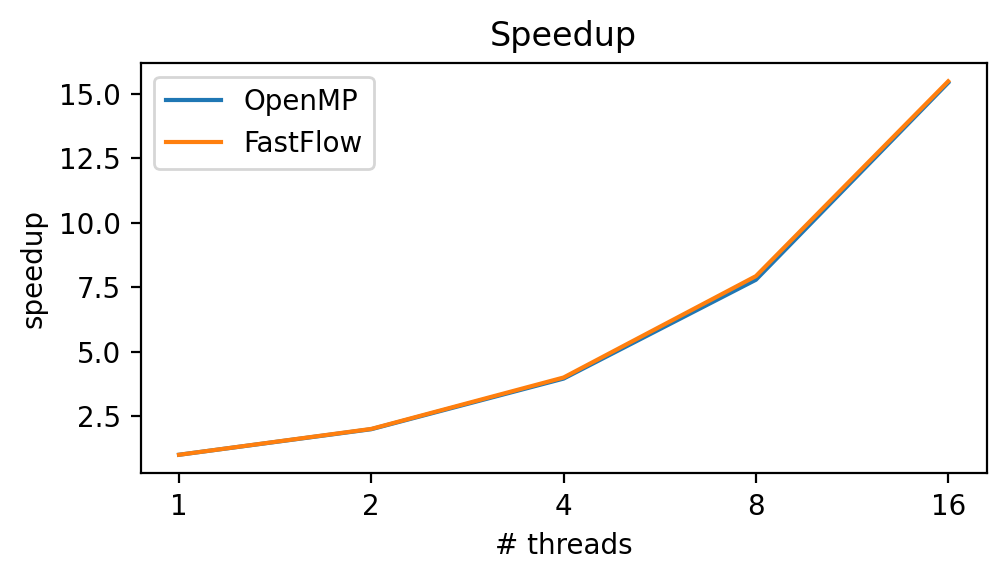

In [4]:
omp_s = df256[df256["backend"] == "seq"]["train_time"].to_numpy() / omp["train_time"].to_numpy()
ff_s = df256[df256["backend"] == "seq"]["train_time"].to_numpy() / ff["train_time"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Speedup")
plt.plot(omp["threads"], omp_s, label="OpenMP")
plt.plot(ff["threads"], ff_s, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("speedup")
plt.legend()
plt.tight_layout()
plt.show()

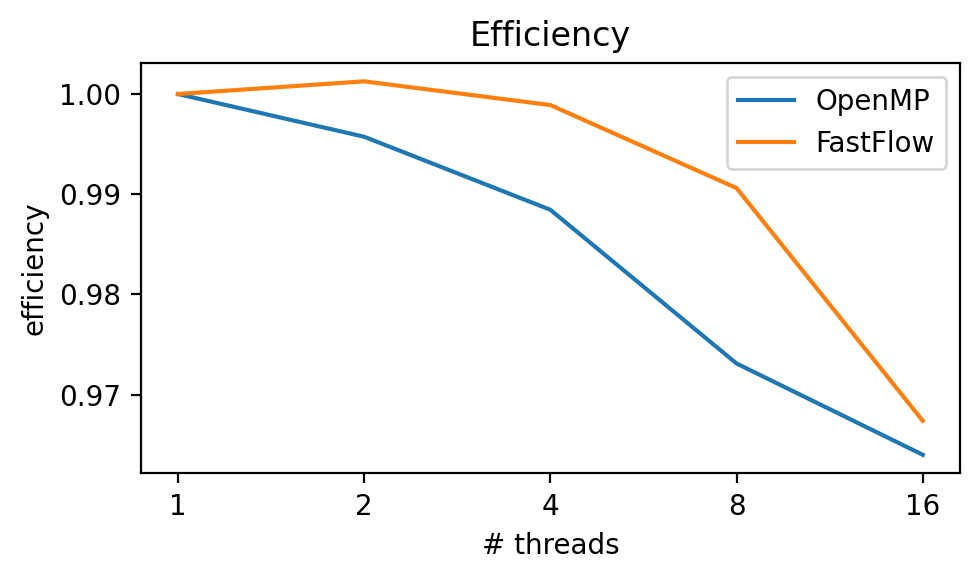

In [5]:
omp_e = omp_s / omp["threads"].to_numpy()
ff_e = ff_s / ff["threads"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Efficiency")
plt.plot(omp["threads"], omp_e, label="OpenMP")
plt.plot(ff["threads"], ff_e, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("efficiency")
plt.legend()
plt.tight_layout()
plt.show()
